In [1]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('seaborn')
import pandas as pd
import yfinance as yf

In [2]:
def download(ticker, start=None, end=None):
    if start is None:
        return yf.Ticker(ticker).history(period="max")
    else:
        return yf.Ticker(ticker).history(start=start, end=end)

In [3]:
df = download('FB')
windows = [5,10,20,60,120,200,240]
for window in windows:
    df[f'{window}d'] = df.Close.rolling(window).mean()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,5d,10d,20d,60d,120d,200d,240d
Date,,,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.23,573576400,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,36.53,36.66,33.00,34.03,168192700,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-22,32.61,33.59,30.94,31.00,101786600,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-23,31.37,32.50,31.36,32.00,73600000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-24,32.95,33.21,31.77,33.03,50237200,0,0,33.658,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,274.78,275.00,265.20,268.94,15106100,0,0,273.550,271.954,274.8350,275.098833,267.955750,243.69825,235.690958
2021-01-05,268.29,272.40,268.21,270.97,9871600,0,0,272.344,271.411,274.3985,275.219000,268.211500,244.30445,235.904333
2021-01-06,262.00,267.75,260.01,263.31,24354100,0,0,269.650,270.463,273.2850,275.200000,268.398000,244.88050,236.093375


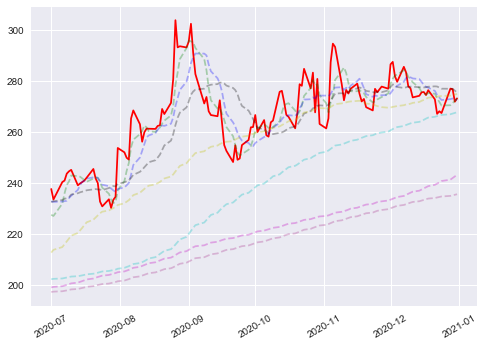

In [4]:
start = '2020-07-01'
end = '2020-12-31'
columns = ['Close'] + [f'{window}d' for window in windows]
colors = ['r','g','b','k','y','c','m','#a8328d']
df_ = df.loc[start:end, columns]
for idx, (column, color) in enumerate(zip(columns,colors)):
    if idx==0:
        plt.plot(df_.index,df_[column],color=color)
    else:
        plt.plot(df_.index,df_[column],color=color,
                 alpha=0.3,linestyle='--')
plt.xticks(rotation=30)
plt.show()

In [5]:
def download_and_plot_moving_average(ticker, 
                                     short_window=5, long_window=21,
                                     start=None, end=None):
    
    df = download(ticker)
    df[f'{short_window}d'] = df.Close.rolling(short_window).mean()
    df[f'{long_window}d'] = df.Close.rolling(long_window).mean()
    
    columns = ['Close', f'{short_window}d', f'{long_window}d']
    colors = ['r','g','b']
    if (start is not None) and (end is not None):
        df_ = df.loc[start:end, columns]
    else:
        df_ = df.loc[:, columns]
        
    for idx, (column, color) in enumerate(zip(columns,colors)):
        if idx==0:
            plt.plot(df_.index,df_[column],color=color,label='Close')
        else:
            plt.plot(df_.index,df_[column],color=color,
                     alpha=0.5,linestyle='--',label=column)    
    plt.xticks(rotation=30)
    plt.title(ticker)
    plt.legend()
    plt.show()

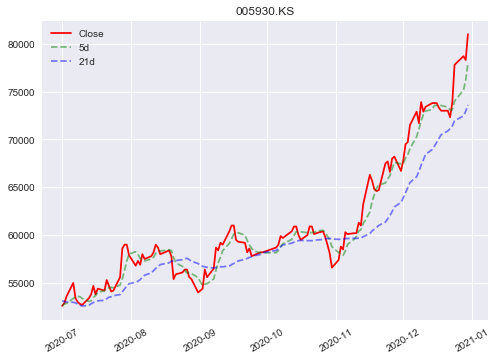

In [6]:
ticker = '005930.KS'
start = '2020-07-01'
end = '2020-12-31'
download_and_plot_moving_average(ticker,
                                 short_window=5, long_window=21,
                                 start=start, end=end)

In [7]:
def read_and_plot_moving_average(ticker,
                                 short_window=5, long_window=21,
                                 start=None, end=None):
    file_name = f'../data/sp500/{ticker}.csv'
    df = pd.read_csv(file_name, parse_dates=True)
    df = df.set_index('Date')
    df[f'{short_window}d'] = df.Close.rolling(short_window).mean()
    df[f'{long_window}d'] = df.Close.rolling(long_window).mean()
    
    columns = ['Close', f'{short_window}d', f'{long_window}d']
    colors = ['r','g','b']
    
    if (start is not None) and (end is not None):
        df_ = df.loc[start:end, columns]
    else:
        df_ = df.loc[:, columns]
        
    fig, ax = plt.subplots()
    for idx, (column, color) in enumerate(zip(columns,colors)):
        if idx==0:
            ax.plot(df_.index,df_[column],color=color,label='Close')
        else:
            ax.plot(df_.index,df_[column],color=color,label=column,
                    alpha=0.5,linestyle='--')
    ax.set_xticks(ax.get_xticks()[::10])
    ax.legend()
    plt.xticks(rotation=90)
    plt.title(ticker)
    plt.show()

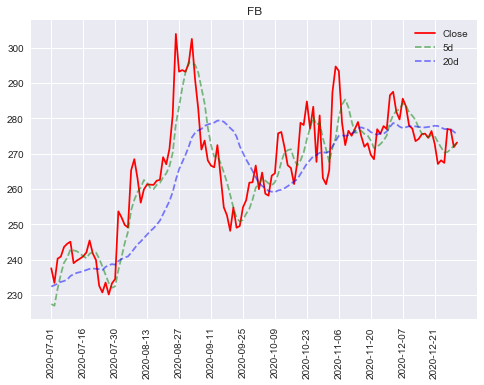

In [8]:
ticker = 'FB'
short_window = 5 
long_window = 5 * 4
start = '2020-07-01'
end = '2020-12-31'
read_and_plot_moving_average(ticker,
                             short_window=short_window,
                             long_window=long_window,
                             start=start,
                             end=end)

In [9]:
url = 'https://raw.githubusercontent.com/datasets/s-and-p-500-companies/master/data/constituents.csv'
df_tickers = pd.read_csv(url)
df_tickers

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ABMD,ABIOMED Inc,Health Care
...,...,...,...
500,YUM,Yum! Brands Inc,Consumer Discretionary
501,ZBRA,Zebra Technologies,Information Technology
502,ZBH,Zimmer Biomet Holdings,Health Care
503,ZION,Zions Bancorp,Financials


In [10]:
short_window = 5 
long_window = 5 * 4
start = '2020-07-01'
end = '2020-12-31'

for ticker in df_tickers.Symbol:
    if ticker=='BRK.B':
        ticker = 'BRK-B'
    if ticker=='BF.B':
        ticker = 'BF-B'
    read_and_plot_moving_average(ticker,
                                 short_window=short_window,
                                 long_window=long_window,
                                 start=start,
                                 end=end)